In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from numpy import mean
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

### Dataset
**Context.** This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

**Content.** Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)

In [8]:
df = pd.read_csv("diabetes - diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                   627.000   50        1  
1                   351.000   31        0  
2                   672.000   32        1  
3                   167.000   21        0  
4                     2.288   33        1  


In [10]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X)

### Baseline model
https://scikit-learn.org/stable/modules/cross_validation.html

In [17]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [19]:
clf_nb = GaussianNB()
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_nb.fit(X_train, y_train)
    y_pred = clf_nb.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

[0.7495827986975903, 0.712225381497869, 0.811276787563578, 0.7509206479794716, 0.7819117315458255]
0.7611834694568669


### Decision Tree models
#### Deep tree

In [24]:
clf_ddt = DecisionTreeClassifier()
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_ddt.fit(X_train, y_train)
    y_pred = clf_ddt.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

[0.746199817757915, 0.6984828896593602, 0.7008015907537438, 0.7181855500821019, 0.7083984200760743]
0.714413653665839


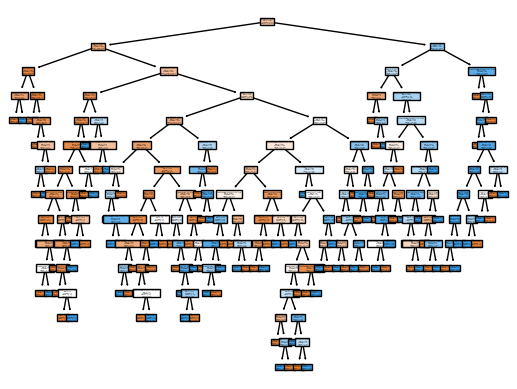

In [26]:
fig = tree.plot_tree(clf_ddt,
                     feature_names = df.columns,
                     class_names = ['False','True'],
                     filled=True)

### Shallow tree

In [49]:
clf_sdt = DecisionTreeClassifier(max_depth=1)
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_sdt.fit(X_train, y_train)
    y_pred = clf_sdt.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

[0.7626954707828778, 0.7052272250510135, 0.7572088928021131, 0.7193267561931156, 0.7170686456400742]
0.7323053980938388


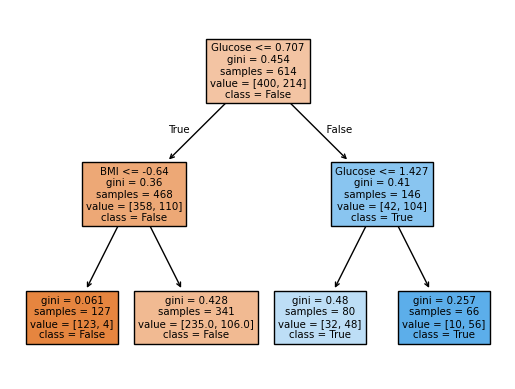

In [31]:
fig = tree.plot_tree(clf_sdt,
                     feature_names = df.columns,
                     class_names = ['False','True'],
                     filled=True)

### Adaboost
The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1.

Remember: Shallow trees have less variance but higher bias and then will be better choice for sequential methods.

In [55]:
clf_ab = AdaBoostClassifier(n_estimators=30, random_state=0, algorithm='SAMME')
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_ab.fit(X_train, y_train)
    y_pred = clf_ab.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

[0.7970601679092433, 0.7236747438378277, 0.7991189116079623, 0.6941382419133849, 0.7910711477798209]
0.7610126426096478


### Random Forest
The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data, max_features=n_features and bootstrap=False, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, random_state has to be fixed.

Remember: Deep trees have low bias but high variance and, so, are relevant choices for bagging.

In [59]:
clf_rf = RandomForestClassifier(n_estimators=2000, random_state=0)
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_rf.fit(X_train, y_train)
    y_pred = clf_rf.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

[0.7998939835674529, 0.7272936403371186, 0.7819117315458255, 0.7436948559373376, 0.7998939835674529]
0.7705376389910374
